In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import missingno as msno
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_columns', None)
df_train = pd.read_csv('C:/Users/user/1/Downloads/house-prices-advanced-regression-techniques/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.shape

(1460, 81)

## Exploratory Data Analysis & Data Cleaning

In [8]:
pd.set_option('display.max_rows', None)
df_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

We will try to understand which of the numerical variables are categorical.

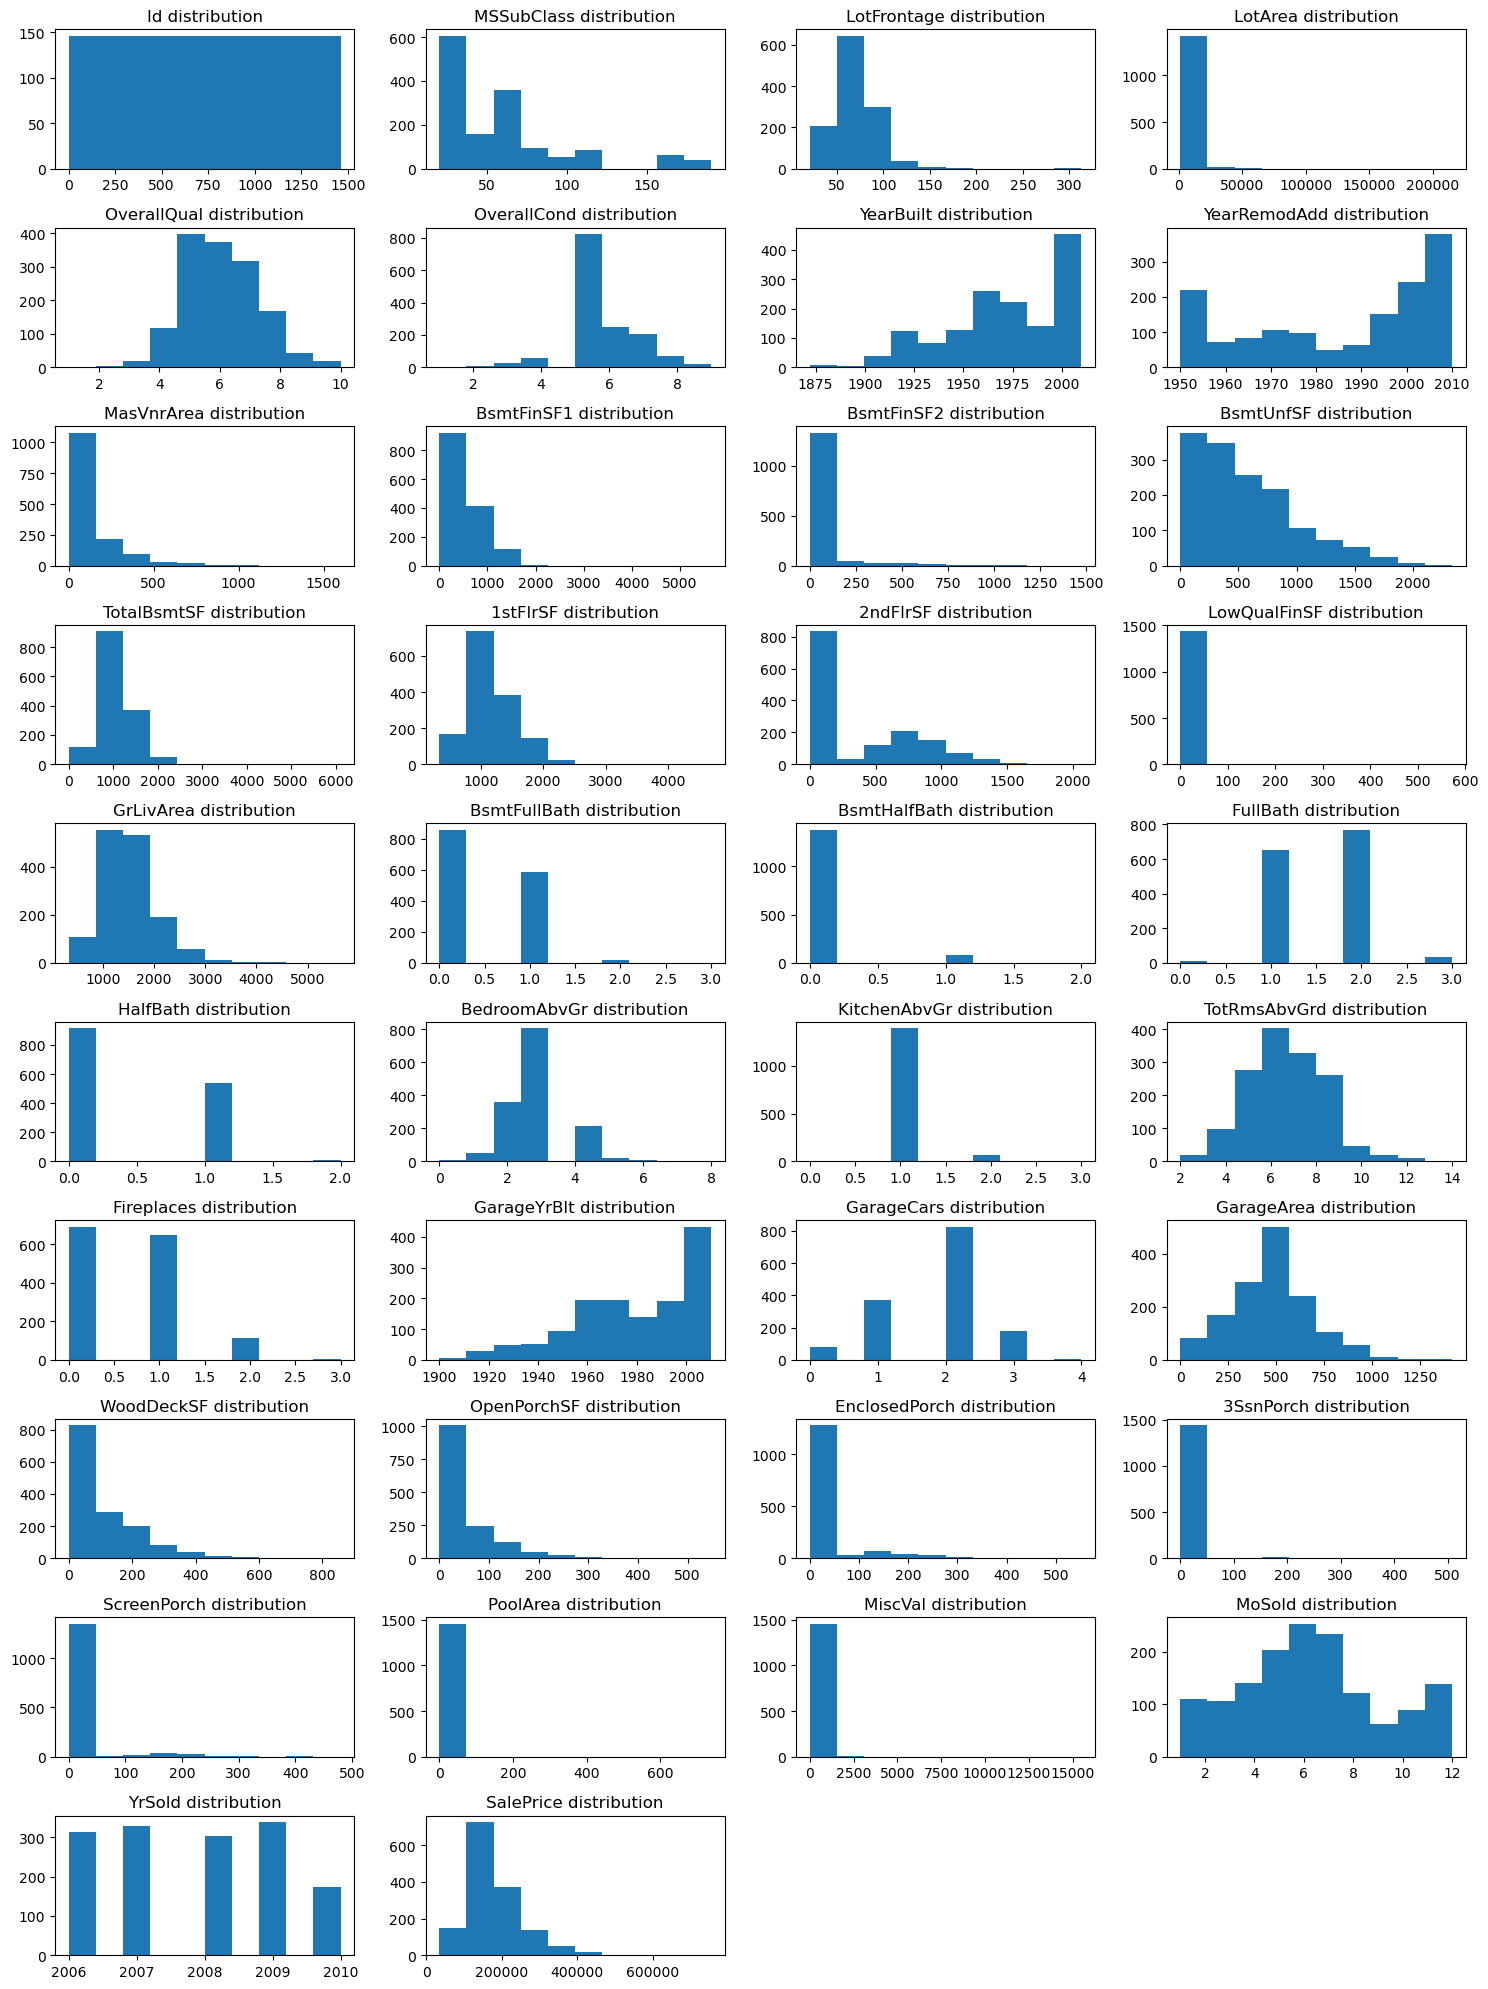

In [9]:
numerical_columns = df_train.select_dtypes(include=['number'])
plt.figure(figsize=(15,20))
for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(10,4,i)
    plt.hist(df_train[col])
    plt.title(f'{col} distribution')
    
plt.tight_layout()
plt.show()

- 'Id' column does not provide any information, so we will drop it

In [10]:
df_train.drop('Id', axis=1, inplace=True)

In [11]:
discrete_vals = {}
for key, value in df_train.nunique().iteritems():
    if value < 12:
        discrete_vals[key] = value
    else:
        continue

print(len(discrete_vals))
discrete_vals

52


{'MSZoning': 5,
 'Street': 2,
 'Alley': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'OverallQual': 10,
 'OverallCond': 9,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'MasVnrType': 4,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'KitchenQual': 4,
 'Functional': 7,
 'Fireplaces': 4,
 'FireplaceQu': 5,
 'GarageType': 6,
 'GarageFinish': 3,
 'GarageCars': 5,
 'GarageQual': 5,
 'GarageCond': 5,
 'PavedDrive': 3,
 'PoolArea': 8,
 'PoolQC': 3,
 'Fence': 4,
 'MiscFeature': 4,
 'YrSold': 5,
 'SaleType': 9,
 'SaleCondition': 6}

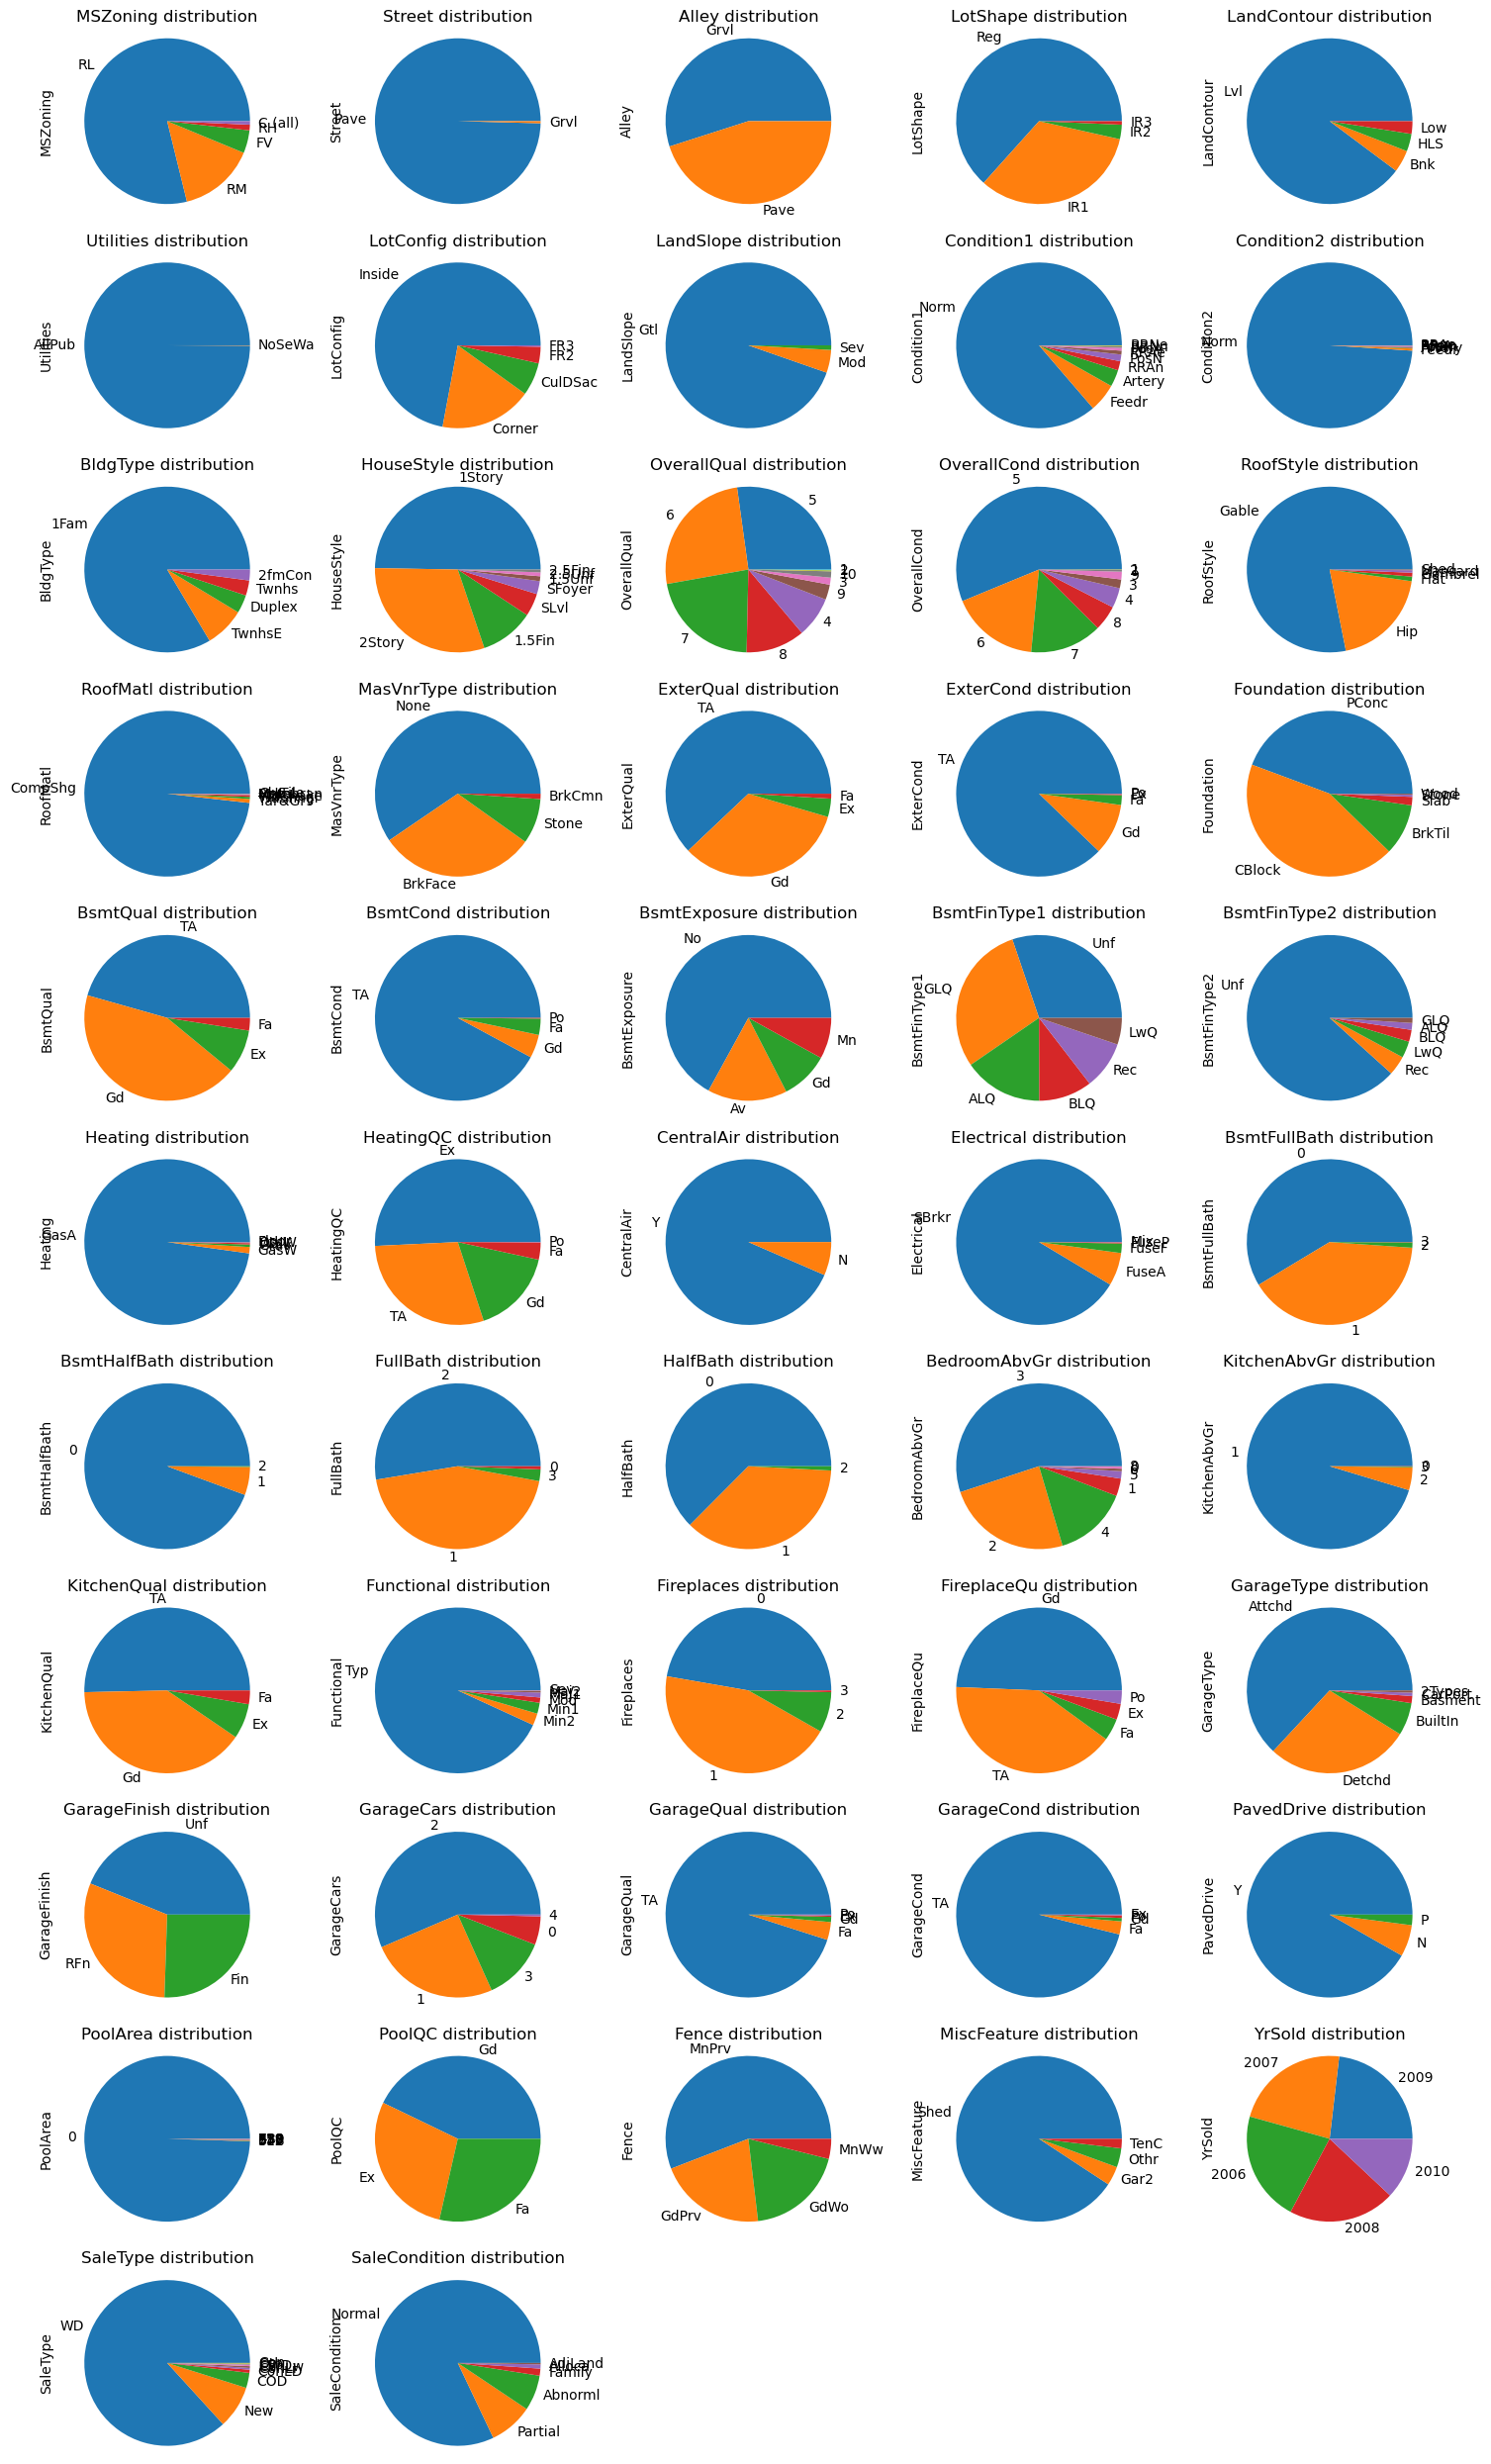

In [12]:
plt.figure(figsize=(15,25))
for i, key in enumerate(discrete_vals.keys(), 1):
    plt.subplot(11, 5, i)
    df_train[key].value_counts().plot.pie()
    plt.title(f'{key} distribution')
    plt.axis('equal')
    
plt.tight_layout()
plt.show()

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


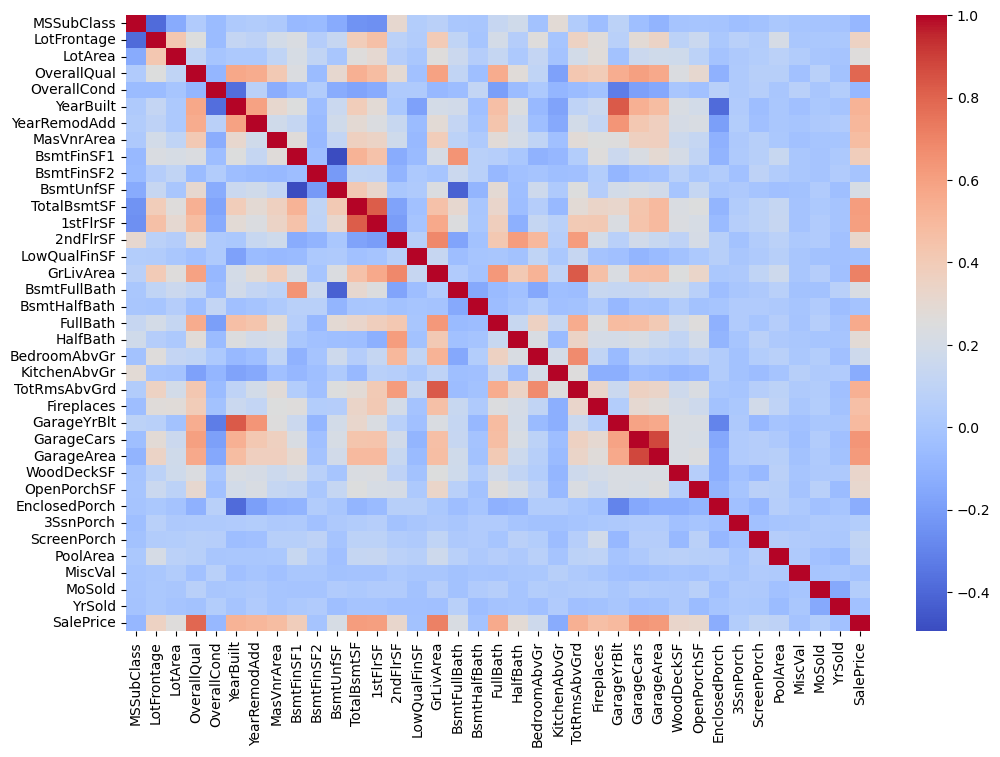

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), cmap='coolwarm')
plt.show()

In [15]:
# Utilities: Type of utilities available
df_train['Utilities'].value_counts()
df_train.drop('Utilities', axis=1, inplace=True)

- Since this column ('Utilities') has 2 levels and the one of them has just one entry, it does provide no information at all, so we will drop it.

### Handling Null Values

In [16]:
pd.set_option('display.max_rows', None)
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

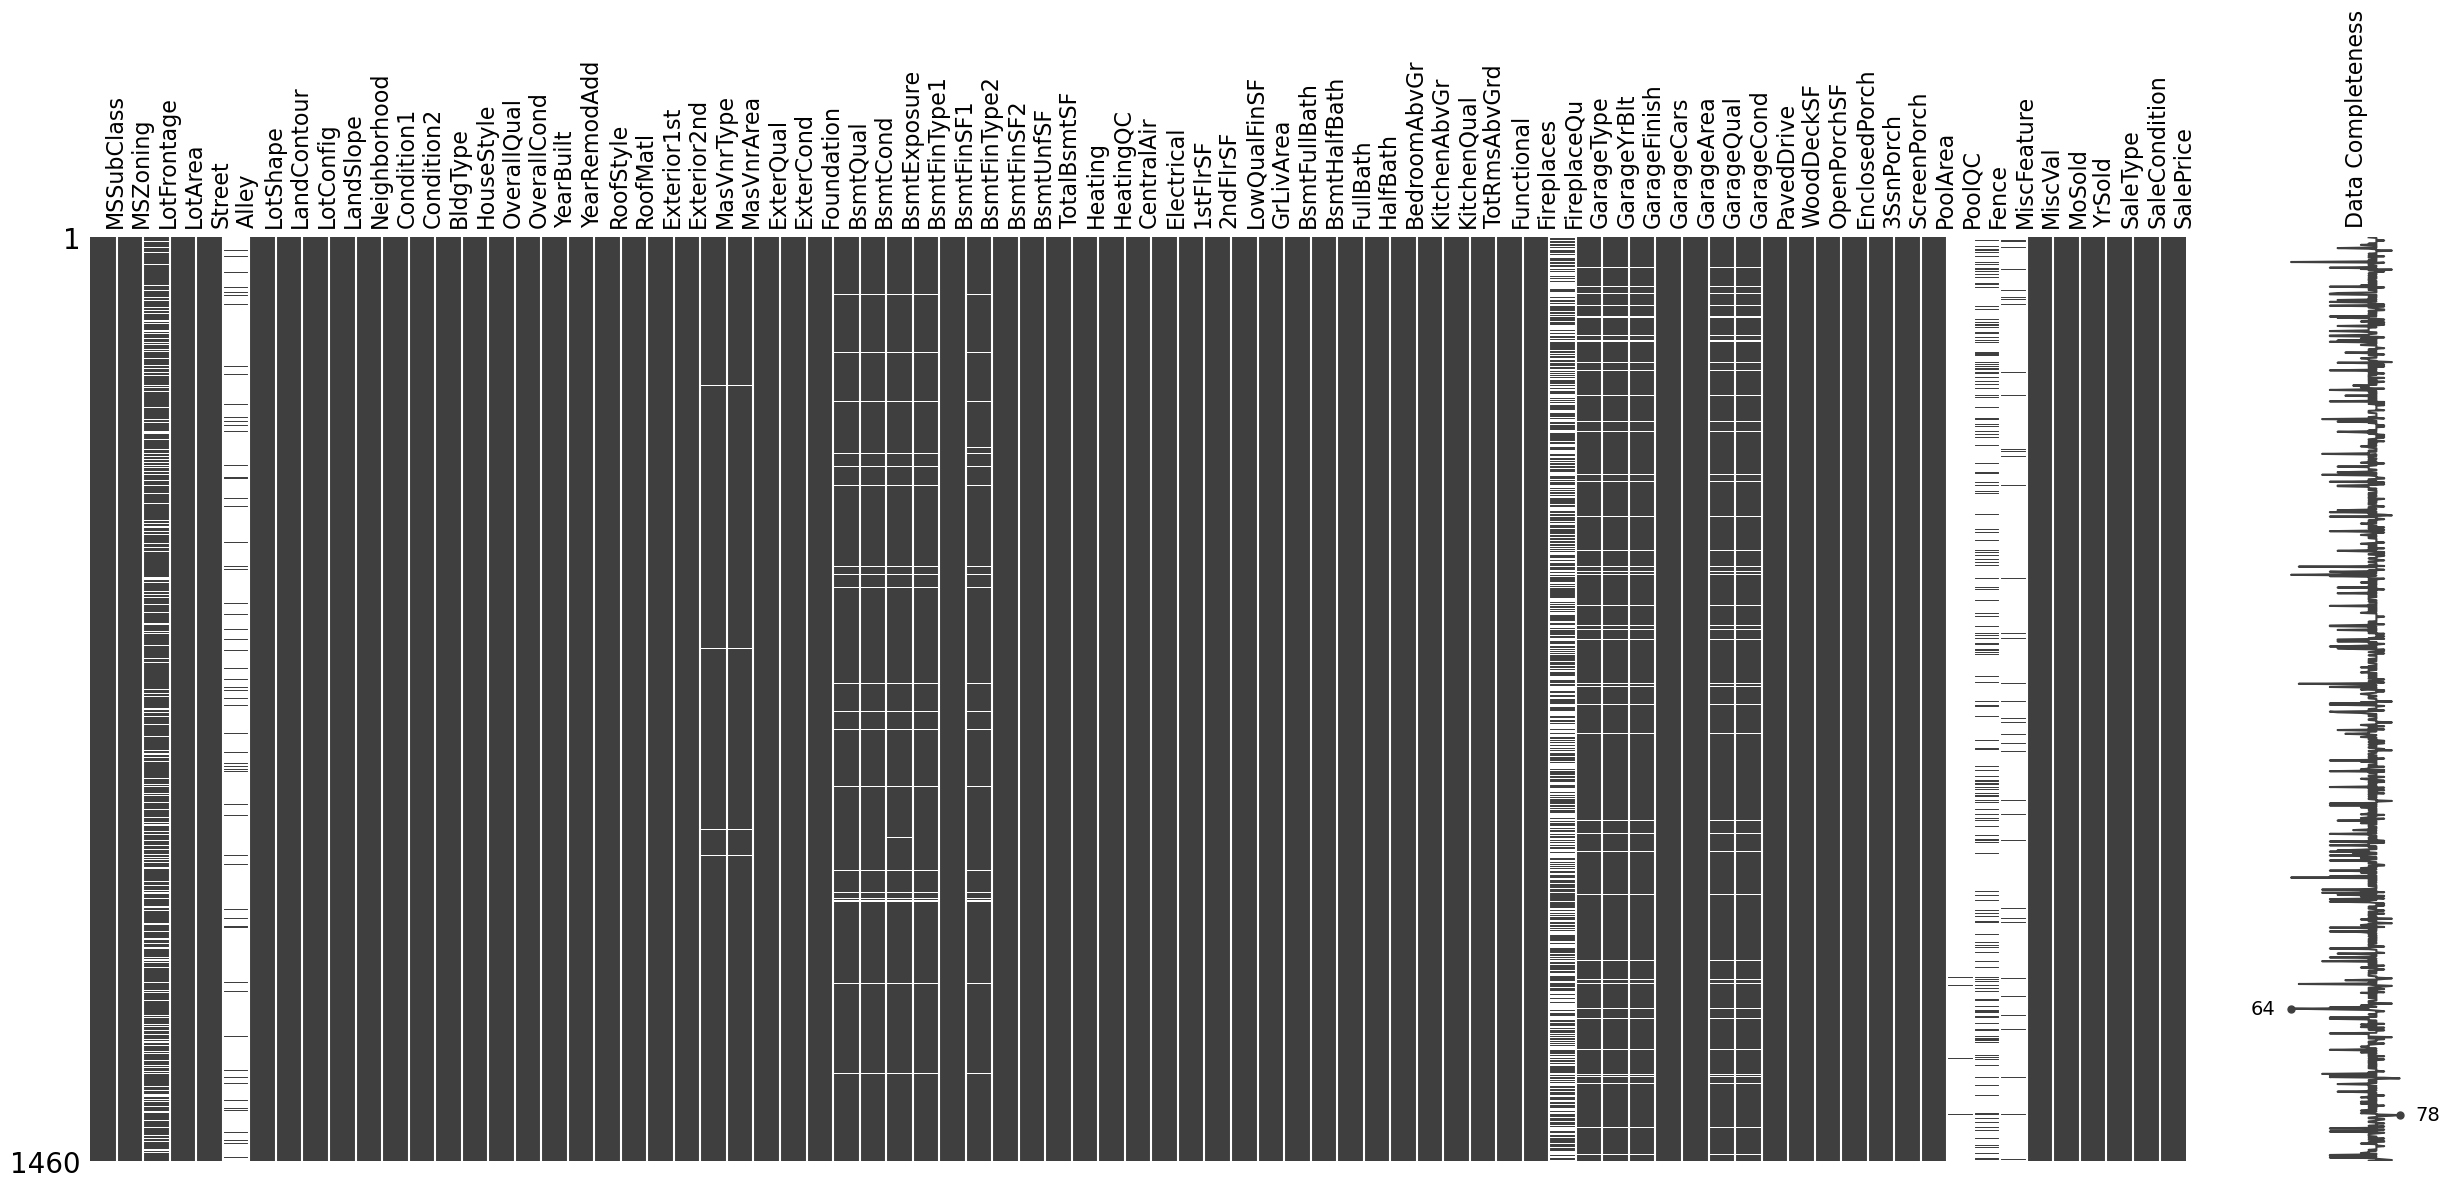

In [17]:
msno.matrix(df_train, labels=True, figsize=(30,12), label_rotation=90)
plt.show()

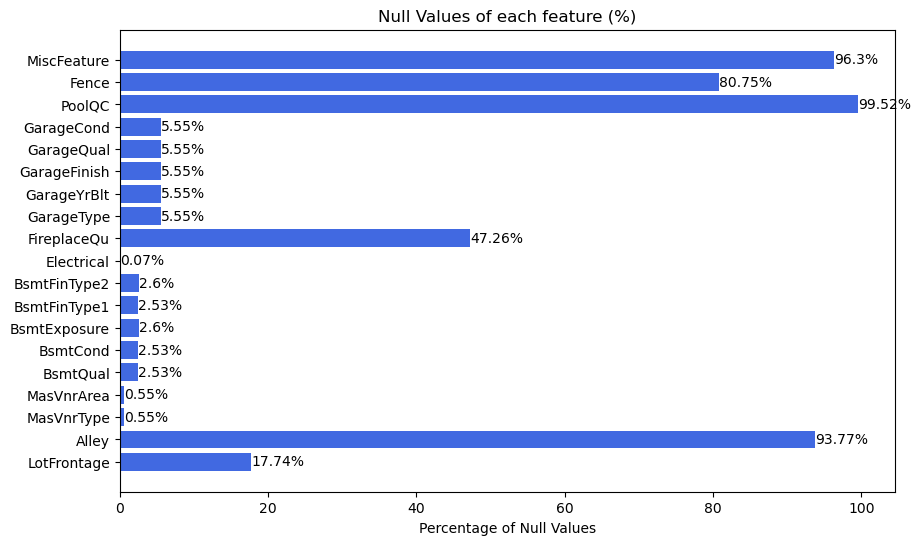

In [18]:
null_percentage = {}
for col in df_train.columns:
    sum_null = df_train[col].isnull().sum()
    sum_null_perc = 100*sum_null/df_train.shape[0]
    if sum_null_perc!=0:
        null_percentage[col] = round(sum_null_perc,2)
    else:
        continue

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(null_percentage)), list(null_percentage.values()), align='center', color='royalblue')

plt.barh(range(len(null_percentage)), list(null_percentage.values()), align='center', color='royalblue')
plt.yticks(range(len(null_percentage)), list(null_percentage.keys()))
plt.xlabel('Percentage of Null Values')
plt.title('Null Values of each feature (%)')
for i, bar in enumerate(bars):
   plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{list(null_percentage.values())[i]}%', va='center', ha='left')

plt.show()

In the dataset, several columns such as 'Alley', 'MiscFeature', 'Fence', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', and 'PoolQC' contain NaN values.  
For instance, a NaN value in the 'BsmtQual' or 'BsmtCond' column indicates that the house does not have a basement. To standardize the dataset, we will replace these NaN values with the label 'No' for discrete variables and -1 for ordinal columns.s

In [19]:
# Alley: Type of alley access to property
df_train['Alley'] = np.where(df_train['Alley'].isnull(), 'No', df_train['Alley'])
df_train['Alley'].value_counts()

No      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [20]:
# MiscFeature : Miscellaneous feature not covered in other categories
# MiscVal : $Value of miscellaneous feature

df_train['MiscFeature'].fillna('No', inplace=True)

df_train.loc[df_train['MiscFeature']!='No', 'MiscFeature'] = 'Yes'

print(df_train['MiscFeature'].value_counts())
df_train.drop('MiscVal', axis=1, inplace=True)

No     1406
Yes      54
Name: MiscFeature, dtype: int64


In [21]:
# Fence
df_train['Fence'].fillna('No', inplace=True)
df_train['Fence'] = np.where(df_train['Fence']!='No', 'Yes', df_train['Fence'])
df_train['Fence'].value_counts()

No     1179
Yes     281
Name: Fence, dtype: int64

In [22]:
# PoolQC : Pool Quality
df_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [23]:
# PoolArea : Pool Area in square feet
df_train['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

- Since there are only 7 houses with pool and 1453 with no pool, the variable 'PoolQC' does not provide us much information and we won't need it.
- Additionally, we wont focus on the area of each pool. Instead we will turn the column 'PoolArea' into a binary variable that shows if a house has a pool or not.

In [24]:
df_train['PoolQC'].fillna(-1, inplace=True)
df_train['Pool'] = np.where(df_train['PoolQC']==-1, 0, 1)# 0: No, 1: Yes
df_train.drop('PoolQC', axis=1, inplace=True)
df_train.drop('PoolArea', axis=1, inplace=True)

In [25]:
# Fireplaces
df_train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

- Additionally, it seems that 690 houses don't have any fireplace, so we expect 690 NaN values for the column 'FireplaceQu'

In [26]:
# FireplaceQu : Fireplace Quality
print(df_train['FireplaceQu'].value_counts())

rating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df_train['FireplaceQu'] = df_train['FireplaceQu'].map(rating_map)

print("")
# Fill missing values with -1
df_train['FireplaceQu'].fillna(-1, inplace=True)
print(df_train['FireplaceQu'].value_counts())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

-1.0    690
 4.0    380
 3.0    313
 2.0     33
 5.0     24
 1.0     20
Name: FireplaceQu, dtype: int64


### Basement

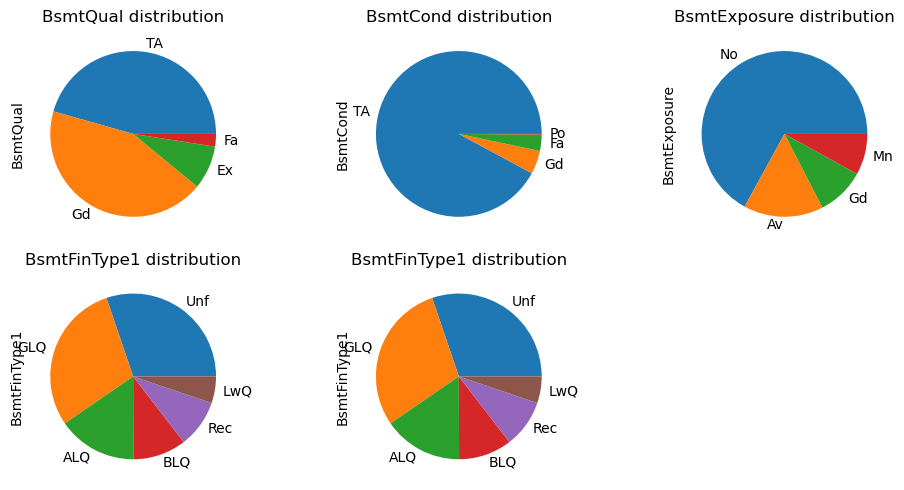

In [27]:
plt.figure(figsize=(10,5))
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType1']
for i, col in enumerate(cols, 1):
    plt.subplot(2,3,i)
    df_train[col].value_counts().plot.pie()
    plt.title(f'{col} distribution')
        
plt.tight_layout()
plt.show()

In [28]:
# NaN values indicate that there is no basement

# BsmtQual : Basement Quality 
rating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df_train['BsmtQual'] = df_train['BsmtQual'].map(rating_map)
df_train['BsmtQual'].fillna(-1, inplace=True)
print(df_train['BsmtQual'].value_counts())

print("")
# BsmtCond : Basement Condition
# NaN values indicate that there is no basement
rating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df_train['BsmtCond'] = df_train['BsmtCond'].map(rating_map)
df_train['BsmtCond'].fillna(-1, inplace=True)
print(df_train['BsmtCond'].value_counts())
    
print("")
# BsmtExposure: Refers to walkout or garden level walls
rating_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}
df_train['BsmtExposure'] = df_train['BsmtExposure'].map(rating_map)  
df_train['BsmtExposure'].fillna(-1, inplace=True)
print(df_train['BsmtExposure'].value_counts())

print("")
# BsmtFinType1: Rating of basement finished area
rating_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LWQ': 2, 'Unf': 1}
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map(rating_map)
df_train['BsmtFinType1'].fillna(-1, inplace=True)
print(df_train['BsmtFinType1'].value_counts())

print("")
# BsmtFinType2: Rating of basement finished area (if multiple types)
rating_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LWQ': 2, 'Unf': 1}
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map(rating_map)
df_train['BsmtFinType2'].fillna(-1, inplace=True)
print(df_train['BsmtFinType2'].value_counts())

 3.0    649
 4.0    618
 5.0    121
-1.0     37
 2.0     35
Name: BsmtQual, dtype: int64

 3.0    1311
 4.0      65
 2.0      45
-1.0      37
 1.0       2
Name: BsmtCond, dtype: int64

 1.0    953
 3.0    221
 4.0    134
 2.0    114
-1.0     38
Name: BsmtExposure, dtype: int64

 1.0    430
 6.0    418
 5.0    220
 4.0    148
 3.0    133
-1.0    111
Name: BsmtFinType1, dtype: int64

 1.0    1256
-1.0      84
 3.0      54
 4.0      33
 5.0      19
 6.0      14
Name: BsmtFinType2, dtype: int64


### Garage

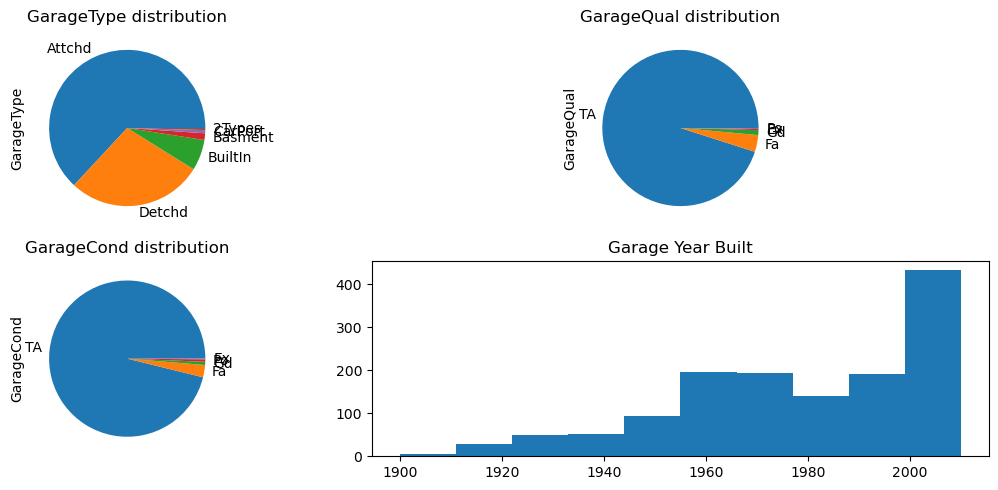

In [29]:
plt.figure(figsize=(12,5))
cols = ['GarageType', 'GarageQual', 'GarageCond']
for i, col in enumerate(cols, 1):
    plt.subplot(2,2,i)
    df_train[col].value_counts().plot.pie()
    plt.title(f'{col} distribution')

plt.subplot(2,2,4)
plt.hist(df_train['GarageYrBlt'])
plt.title('Garage Year Built')
plt.tight_layout()
plt.show()

In [30]:
# NaN values indicate that there is no garage

# GarageType: Garage location
df_train['GarageType'].fillna('NoGarage', inplace=True)

# GarageFinish: Interior finish of the garage
df_train['GarageFinish'].fillna('NoGarage', inplace=True)

# GarageQual: Garage quality
rating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df_train['GarageQual'] = df_train['GarageQual'].map(rating_map)
df_train['GarageQual'].fillna(-1, inplace=True)
print(df_train['GarageQual'].value_counts())

print("")
# GarageCond: Garage condition
rating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df_train['GarageCond'] = df_train['GarageCond'].map(rating_map)
df_train['GarageCond'].fillna(-1, inplace=True)
print(df_train['GarageCond'].value_counts())

# GarageYrBlt: Garage Year Built
# df_train['GarageYrBlt'].fillna(0, inplace=True)

 3.0    1311
-1.0      81
 2.0      48
 4.0      14
 5.0       3
 1.0       3
Name: GarageQual, dtype: int64

 3.0    1326
-1.0      81
 2.0      35
 4.0       9
 1.0       7
 5.0       2
Name: GarageCond, dtype: int64


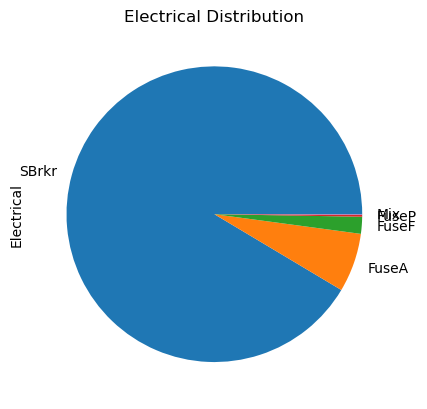

In [31]:
# Electrical
df_train.Electrical.value_counts().plot.pie()
plt.title('Electrical Distribution')
plt.show()
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)

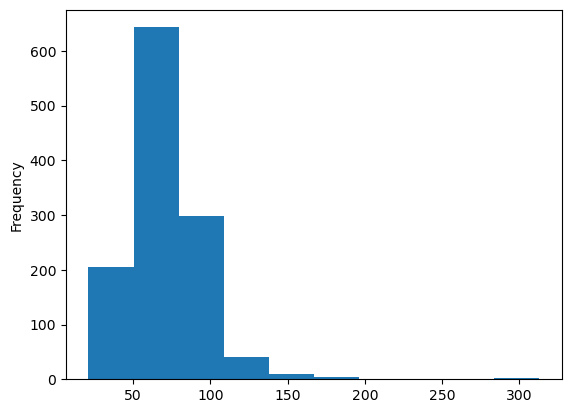

In [32]:
# LotFrontage: Linear feet of street connected to property\n",
df_train['LotFrontage'].plot.hist()
plt.show()
df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(), inplace=True)

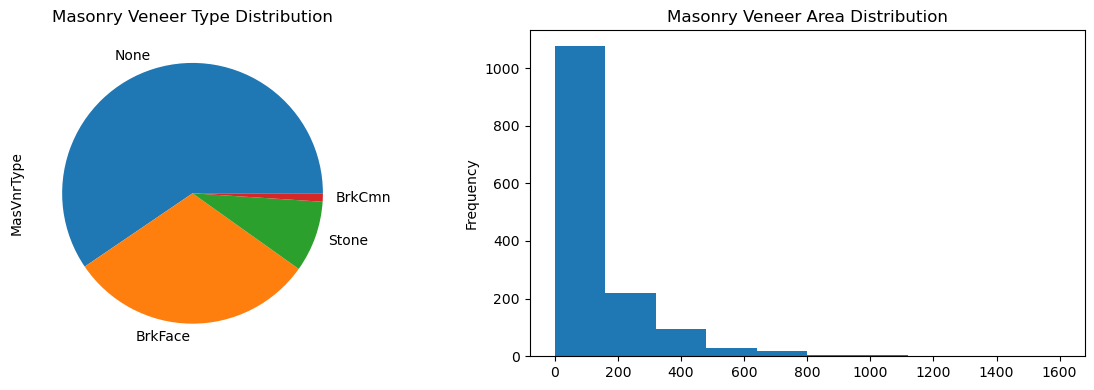

In [33]:
# MasVnrType: Masonry veneer type
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_train['MasVnrType'].value_counts().plot.pie()
plt.title('Masonry Veneer Type Distribution')
df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0], inplace=True)

# MasVnrArea: Masonry veneer area in square feet
plt.subplot(1,2,2)
df_train['MasVnrArea'].plot.hist()
plt.title('Masonry Veneer Area Distribution')

plt.tight_layout()
plt.show()

df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(), inplace=True)

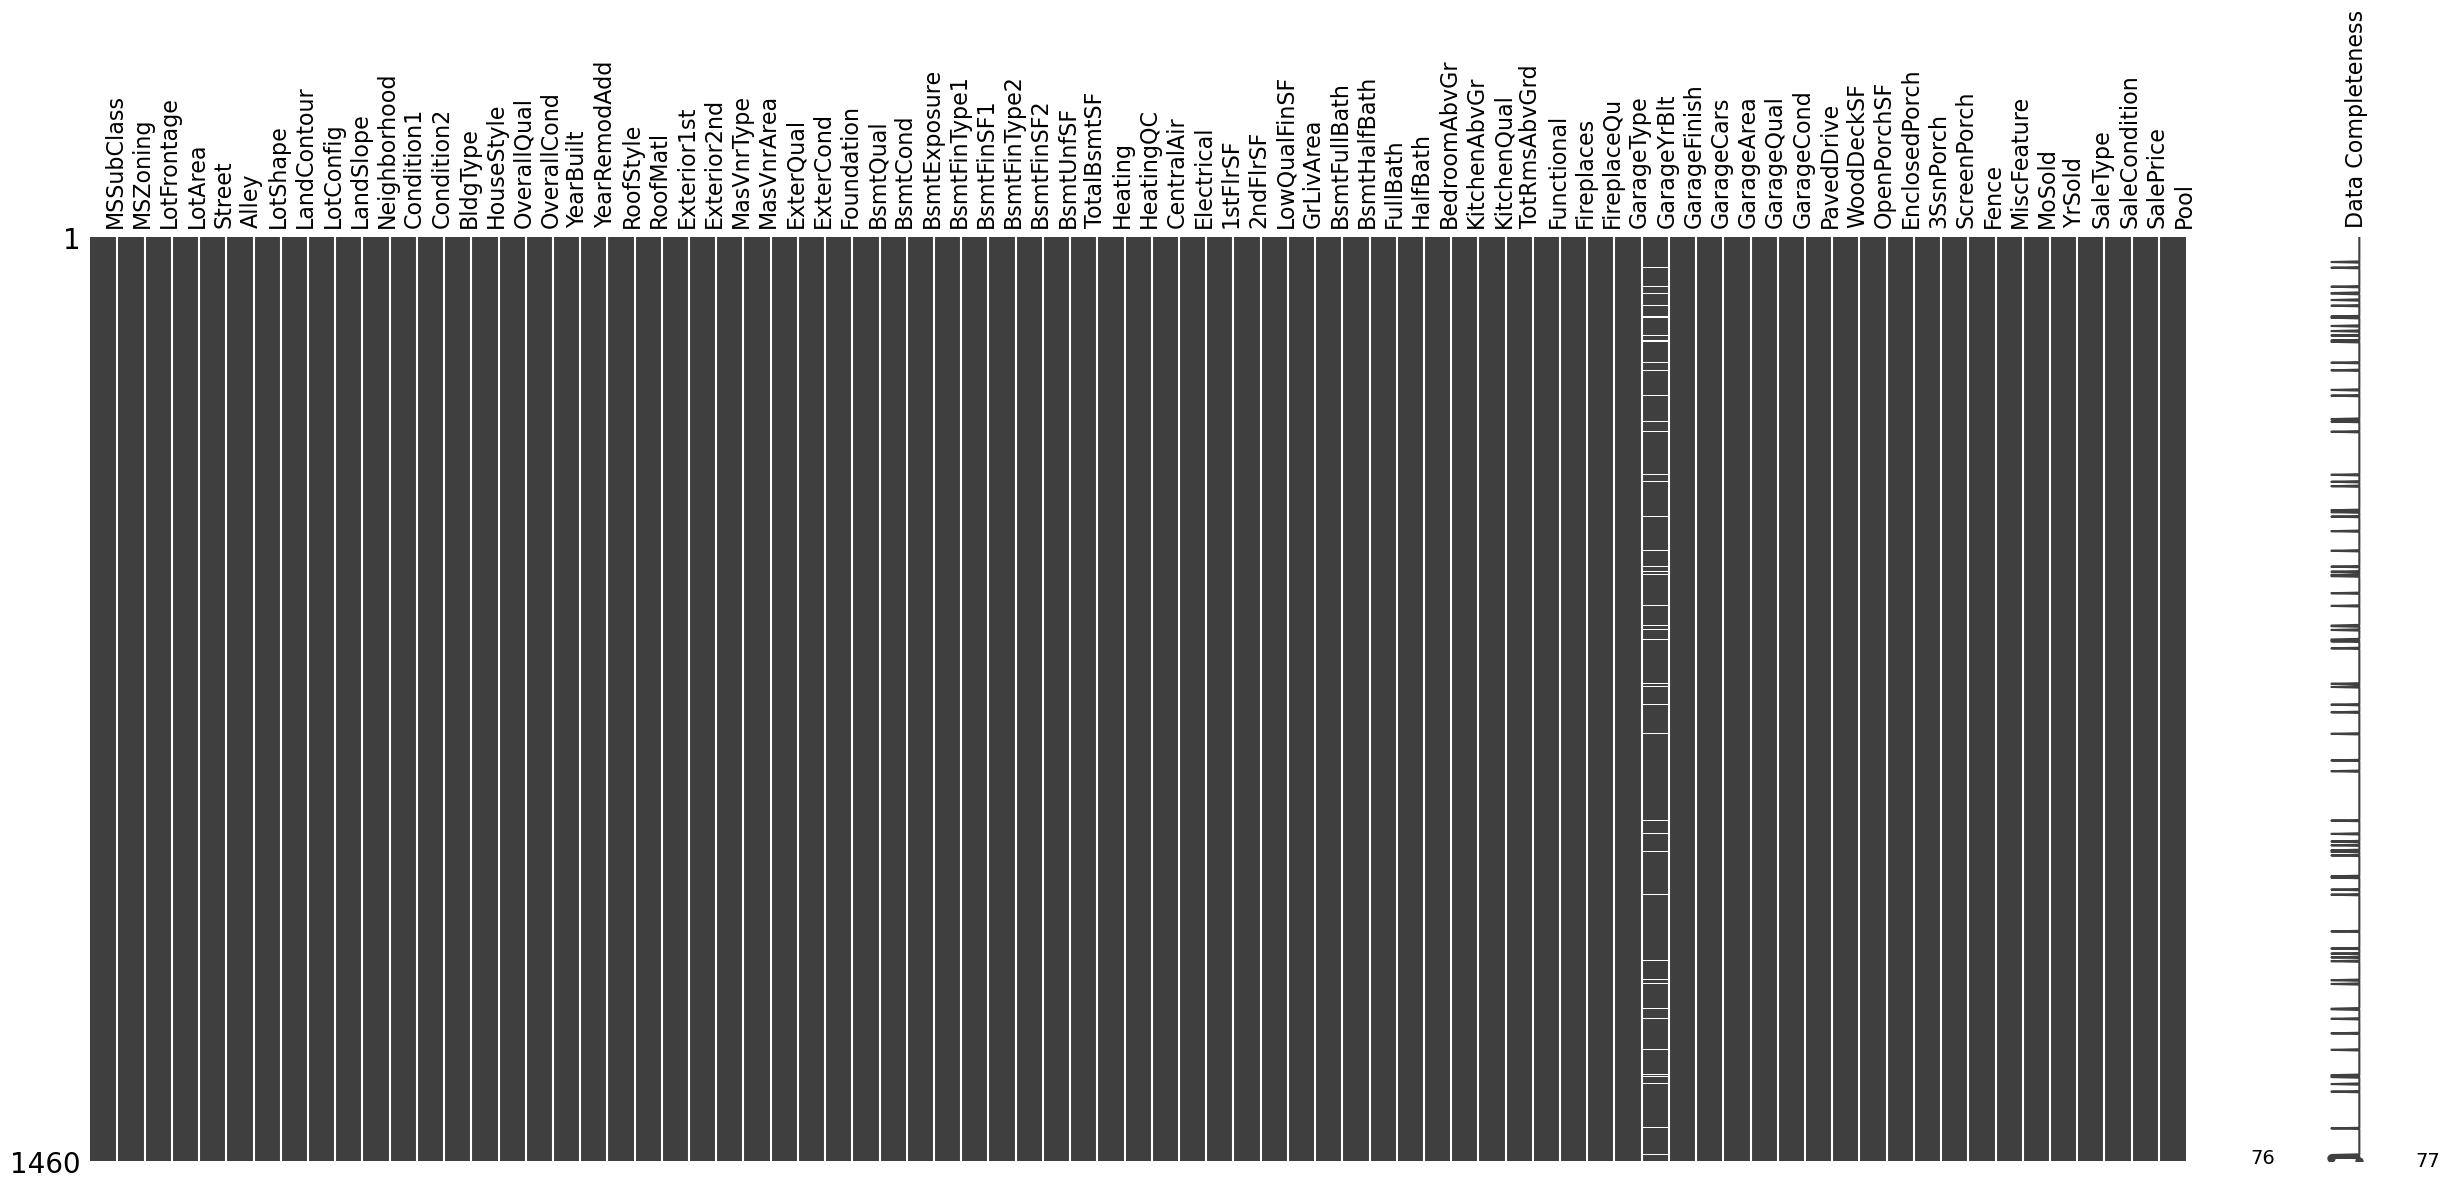

In [34]:
msno.matrix(df_train, labels=True, figsize=(30,12), label_rotation=90)
plt.show()

In [35]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,-1.0,Attchd,2003.0,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,No,No,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,No,No,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3.0,Attchd,2001.0,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,No,No,9,2008,WD,Normal,223500,0
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4.0,Detchd,1998.0,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,No,No,2,2006,WD,Abnorml,140000,0
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3.0,Attchd,2000.0,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,No,No,12,2008,WD,Normal,250000,0


### Multivariate Analysis

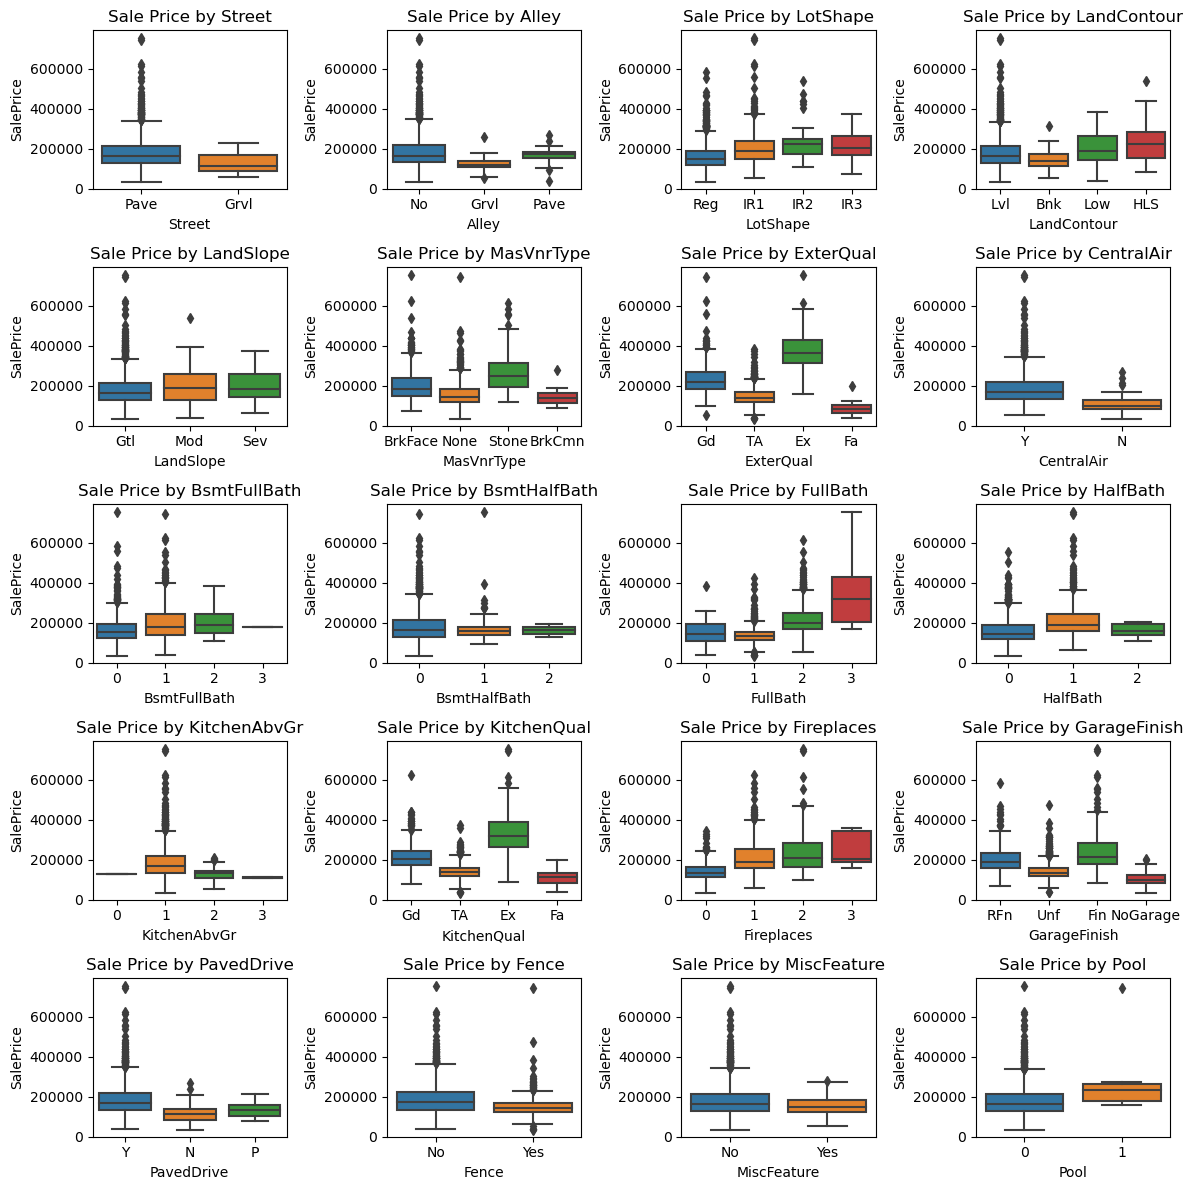

In [37]:
categ = []
for i in df_train.columns:
    if df_train[i].nunique()<5:
        categ.append(i)

plt.figure(figsize=(12,12))
for i, col in enumerate(categ, 1):
    plt.subplot(5,4,i)
    sns.boxplot(x=df_train[col], y=df_train['SalePrice'])
    plt.title(f'Sale Price by {col}')

plt.tight_layout()
plt.show()

In [38]:
numericals = []
values = []
for col in df_train.columns:
    if df_train[col].nunique()>20:
        numericals.append(col)
        values.append(df_train[col].nunique())
    else:
        continue

for i in range(len(numericals)):
    print(numericals[i],':', values[i])

LotFrontage : 110
LotArea : 1073
Neighborhood : 25
YearBuilt : 112
YearRemodAdd : 61
MasVnrArea : 327
BsmtFinSF1 : 637
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
GarageYrBlt : 97
GarageArea : 441
WoodDeckSF : 274
OpenPorchSF : 202
EnclosedPorch : 120
ScreenPorch : 76
SalePrice : 663


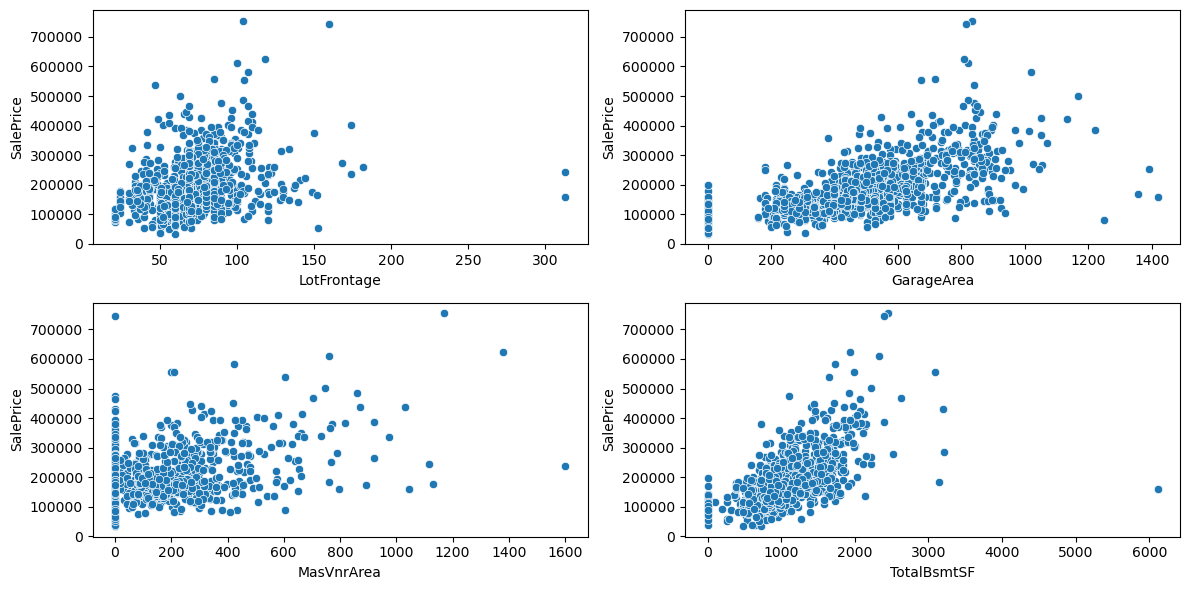

In [39]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.scatterplot(x=df_train['LotFrontage'], y=df_train['SalePrice'])
plt.subplot(2,2,2)
sns.scatterplot(x=df_train['GarageArea'], y=df_train['SalePrice'])
plt.subplot(2,2,3)
sns.scatterplot(x=df_train['MasVnrArea'], y=df_train['SalePrice'])
plt.subplot(2,2,4)
sns.scatterplot(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'])

plt.tight_layout()
plt.show()

### Feature Engineering

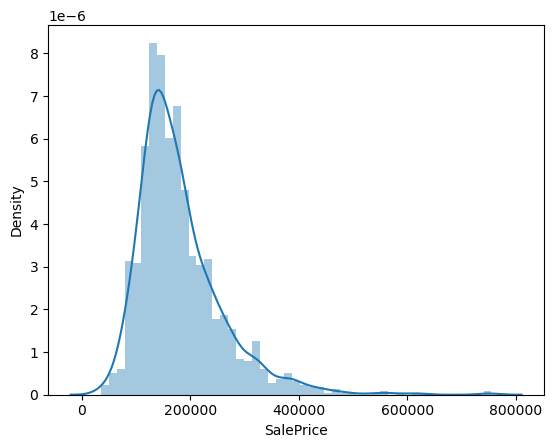

In [40]:
sns.distplot(df_train['SalePrice'])
plt.show()

In [41]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- The distribution plot indicates that the variable 'SalePrice' tends to follow the Gaussian distribution. However, it's clear that there is positive skewness in the distribution because there are a lot of outliers.
- We are going to use the logarithmic transformation in order to compress the range of the values and the distribution become more symmetrical. 

In [42]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

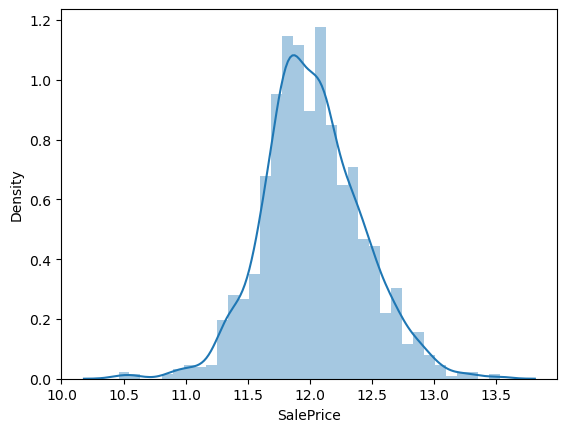

In [43]:
sns.distplot(df_train['SalePrice'])
plt.show()

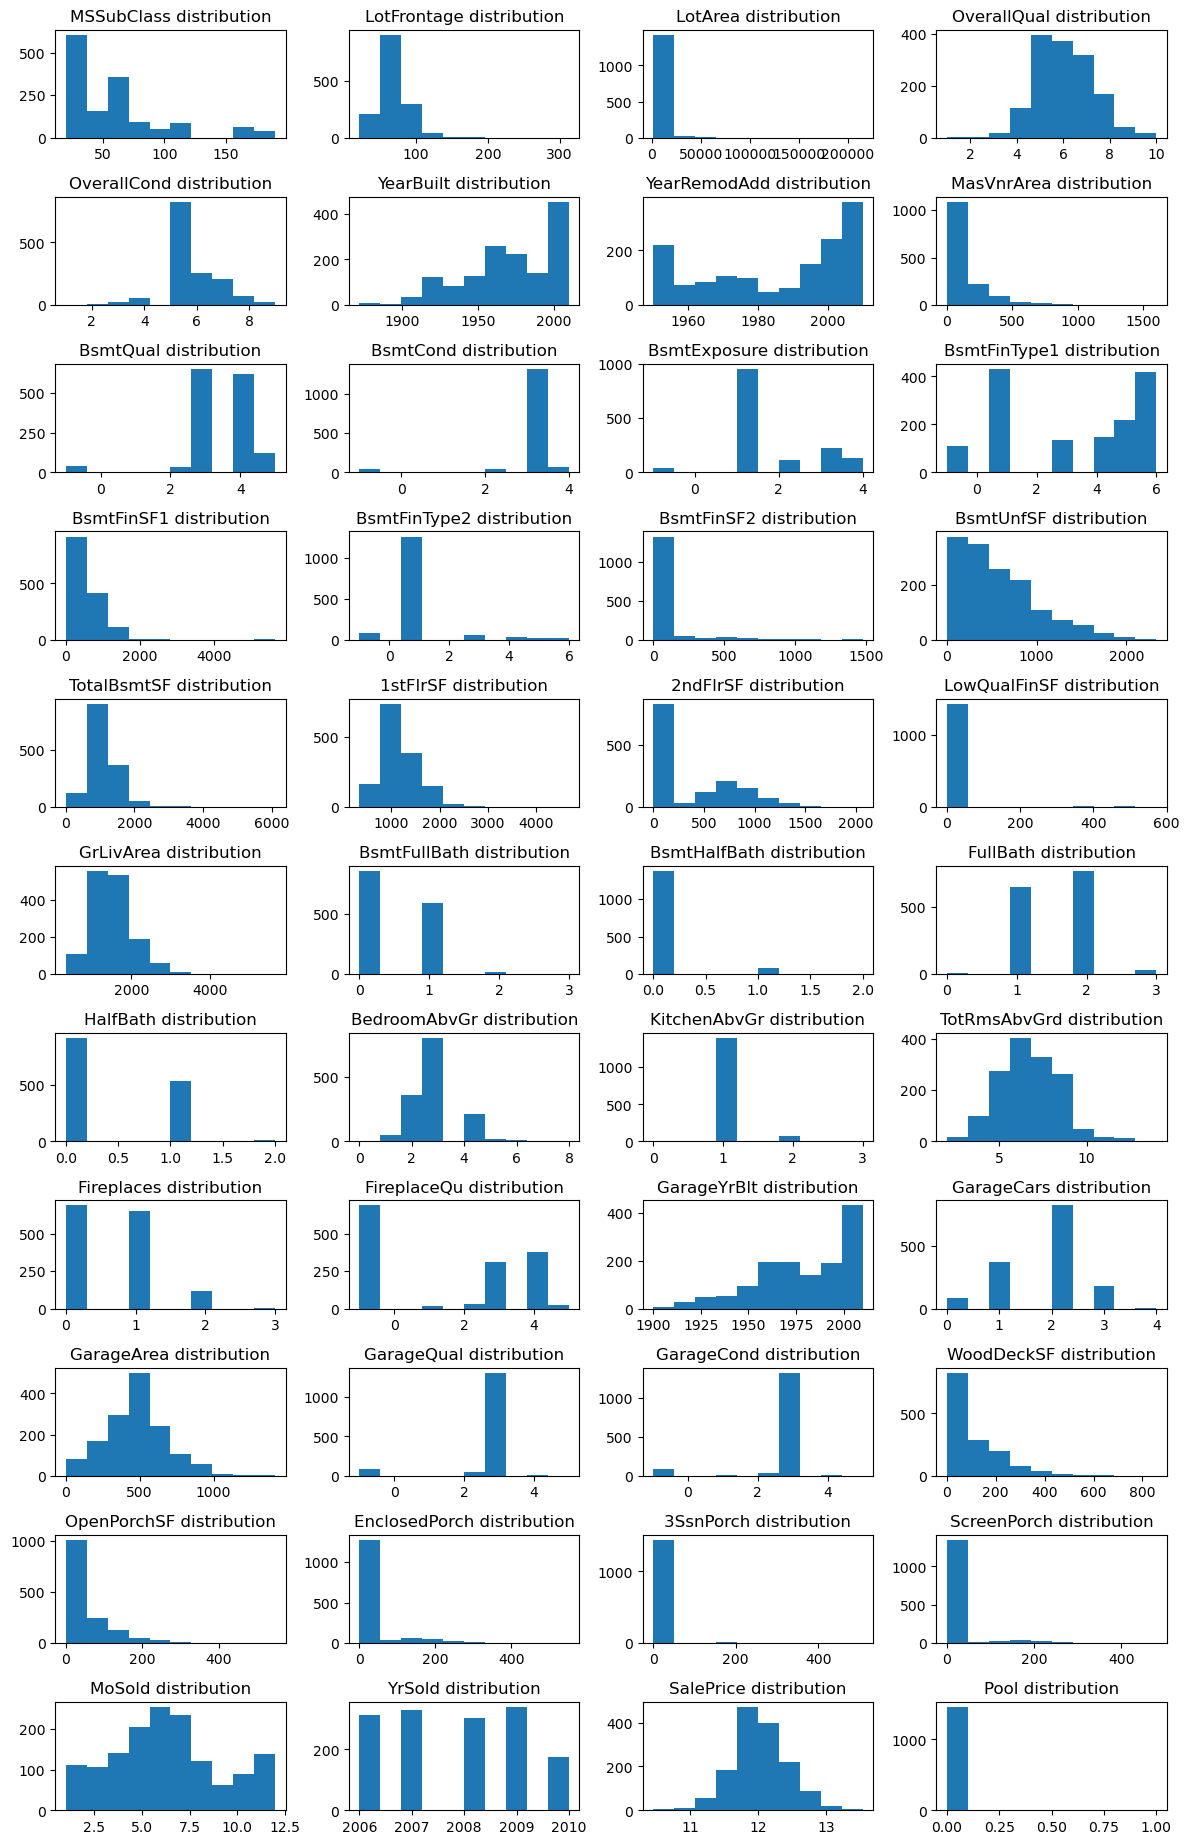

In [44]:
numerical_columns = df_train.select_dtypes(include=['number'])
plt.figure(figsize=(12,25))
for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(15,4,i)
    plt.hist(df_train[col])
    plt.title(f'{col} distribution')
    
plt.tight_layout()
plt.show()

- As we can see from the following histograms, similar to our target variable, there are some additional explanatory variables that have positive skewness in their distribution.
- We are also going to transformate some of them using the logarithmic function as well.

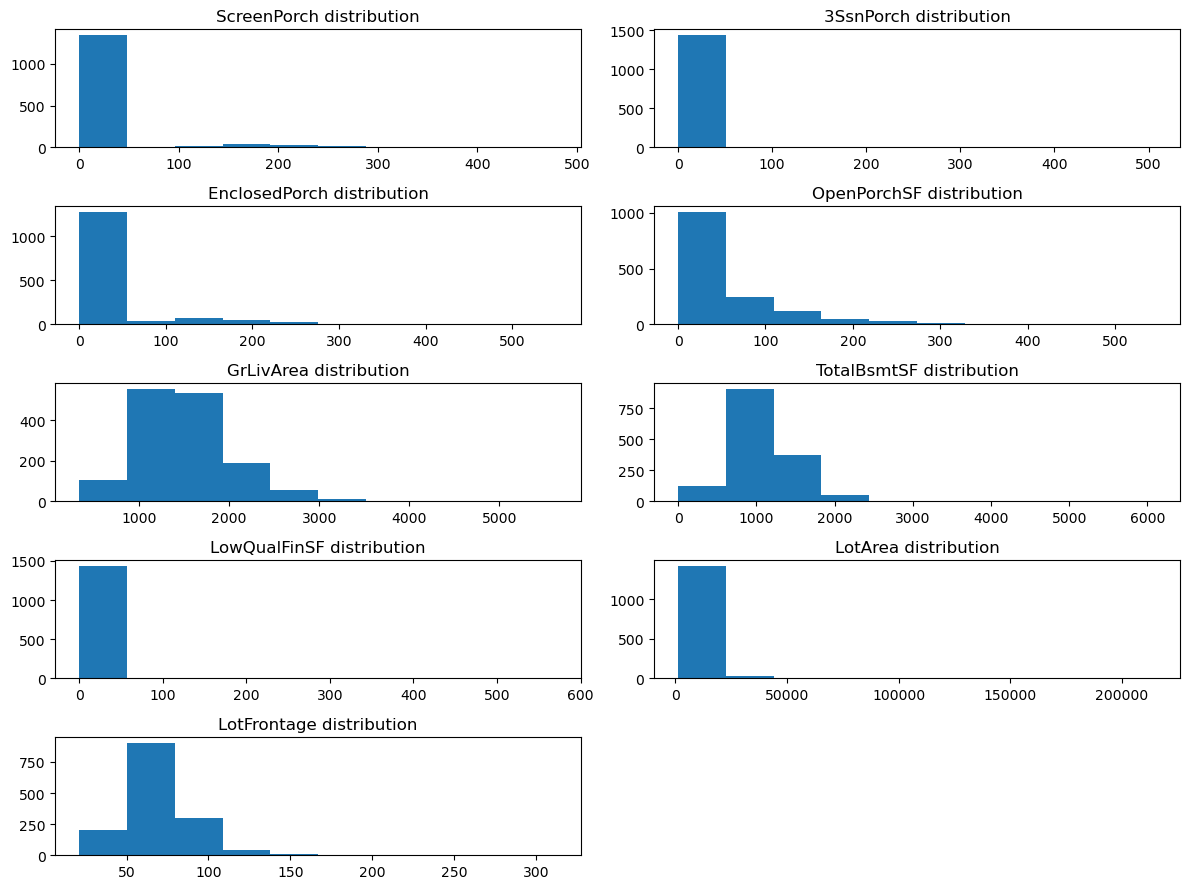

In [45]:
cols = ['ScreenPorch', '3SsnPorch', 'EnclosedPorch','OpenPorchSF','GrLivArea','TotalBsmtSF','LowQualFinSF','LotArea','LotFrontage']

plt.figure(figsize=(12,9))
for j, i in enumerate(cols, 1):
    plt.subplot(5,2,j)
    plt.hist(df_train[i])
    plt.title(f'{i} distribution')

plt.tight_layout()
plt.show()

In [46]:
cols = ['GrLivArea','LotArea','LotFrontage']

for i in cols:
    df_train[i] = np.log1p(df_train[i])

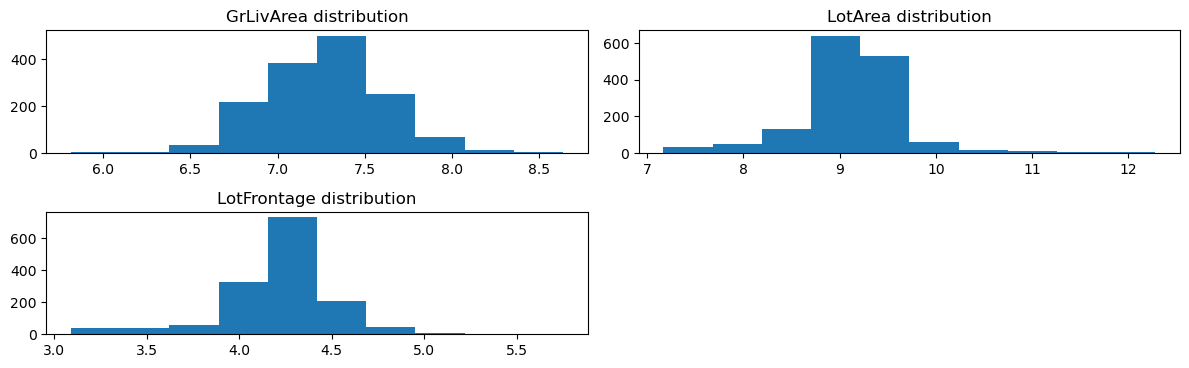

In [47]:
plt.figure(figsize=(12,9))
for j, i in enumerate(cols, 1):
    plt.subplot(5,2,j)
    plt.hist(df_train[i])
    plt.title(f'{i} distribution')

plt.tight_layout()
plt.show()

In [48]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool
0,60,RL,4.189655,9.042040,Pave,No,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,-1.0,Attchd,2003.0,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,No,No,2,2008,WD,Normal,12.247694,0
1,20,RL,4.394449,9.169623,Pave,No,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,No,No,5,2007,WD,Normal,12.109011,0
2,60,RL,4.234107,9.328212,Pave,No,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,7.488294,1,0,2,1,3,1,Gd,6,Typ,1,3.0,Attchd,2001.0,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,No,No,9,2008,WD,Normal,12.317167,0
3,70,RL,4.110874,9.164401,Pave,No,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,7.448916,1,0,1,0,3,1,Gd,7,Typ,1,4.0,Detchd,1998.0,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,No,No,2,2006,WD,Abnorml,11.849398,0
4,60,RL,4.442651,9.565284,Pave,No,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,7.695758,1,0,2,1,4,1,Gd,9,Typ,1,3.0,Attchd,2000.0,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,No,No,12,2008,WD,Normal,12.429216,0


## Data Preprocessing

### Ordinal Encoding

- As we saw before there are a lot of ordinal descrete variables that most of them take values from 0 to 5
- We are going to use the OrdinalEncoder() in order to encode these ordinal discrete variables into numerical values

In [49]:
encoder = OrdinalEncoder()
ordinal_columns = ['LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                  'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                  'GarageQual', 'GarageCond']

df_train[ordinal_columns] = encoder.fit_transform(df_train[ordinal_columns])
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool
0,60,RL,4.189655,9.042040,Pave,No,3.0,3.0,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2.0,4.0,PConc,3.0,3.0,1.0,5.0,706,1.0,0,150,856,GasA,0.0,Y,SBrkr,856,854,0,7.444833,1,0,2,1,3,1,2.0,8,Typ,0,0.0,Attchd,2003.0,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,No,No,2,2008,WD,Normal,12.247694,0
1,20,RL,4.394449,9.169623,Pave,No,3.0,3.0,FR2,0.0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3.0,4.0,CBlock,3.0,3.0,4.0,4.0,978,1.0,0,284,1262,GasA,0.0,Y,SBrkr,1262,0,0,7.141245,0,1,2,0,3,1,3.0,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,No,No,5,2007,WD,Normal,12.109011,0
2,60,RL,4.234107,9.328212,Pave,No,0.0,3.0,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2.0,4.0,PConc,3.0,3.0,2.0,5.0,486,1.0,0,434,920,GasA,0.0,Y,SBrkr,920,866,0,7.488294,1,0,2,1,3,1,2.0,6,Typ,1,3.0,Attchd,2001.0,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,No,No,9,2008,WD,Normal,12.317167,0
3,70,RL,4.110874,9.164401,Pave,No,0.0,3.0,Corner,0.0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3.0,4.0,BrkTil,2.0,4.0,1.0,4.0,216,1.0,0,540,756,GasA,2.0,Y,SBrkr,961,756,0,7.448916,1,0,1,0,3,1,2.0,7,Typ,1,4.0,Detchd,1998.0,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,No,No,2,2006,WD,Abnorml,11.849398,0
4,60,RL,4.442651,9.565284,Pave,No,0.0,3.0,FR2,0.0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2.0,4.0,PConc,3.0,3.0,3.0,5.0,655,1.0,0,490,1145,GasA,0.0,Y,SBrkr,1145,1053,0,7.695758,1,0,2,1,4,1,2.0,9,Typ,1,3.0,Attchd,2000.0,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,No,No,12,2008,WD,Normal,12.429216,0


### Dummy Variables

In [50]:
non_numerical_columns = df_train.select_dtypes(exclude=['number']).columns
non_numerical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

- There are 26 non-numerical variables. We need to create dummy variables in order to include them in a machine learning model.
- For every column i that has j levels we will create j-1 dummies because the first statistical learning method we are going to use is Linear Regression.

In [51]:
df_train_dummies = pd.get_dummies(df_train[non_numerical_columns], drop_first=True)
df_train = pd.concat([df_train, df_train_dummies], axis=1)

In [52]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_Yes,MiscFeature_Yes,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,4.189655,9.042040,Pave,No,3.0,3.0,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2.0,4.0,PConc,3.0,3.0,1.0,5.0,706,1.0,0,150,856,GasA,0.0,Y,SBrkr,856,854,0,7.444833,1,0,2,1,3,1,2.0,8,Typ,0,0.0,Attchd,2003.0,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,No,No,2,2008,WD,Normal,12.247694,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [53]:
df_train.shape

(1460, 229)

In [54]:
df_train.drop(non_numerical_columns, axis=1, inplace=True)
df_train.shape

(1460, 203)

In [55]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SalePrice,Pool,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_Yes,MiscFeature_Yes,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,4.189655,9.042040,3.0,3.0,0.0,7,5,2003,2003,196.0,2.0,4.0,3.0,3.0,1.0,5.0,706,1.0,0,150,856,0.0,856,854,0,7.444833,1,0,2,1,3,1,2.0,8,0,0.0,2003.0,2,548,3.0,3.0,0,61,0,0,0,2,2008,12.247694,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,4.394449,9.169623,3.0,3.0,0.0,6,8,1976,1976,0.0,3.0,4.0,3.0,3.0,4.0,4.0,978,1.0,0,284,1262,0.0,1262,0,0,7.141245,0,1,2,0,3,1,3.0,6,1,3.0,1976.0,2,460,3.0,3.0,298,0,0,0,0,5,2007,12.109011,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

- We have completed the data preprocessing and we are going to apply a set of machine learning methods in order to predict house prices.

# Machine Learning

In [56]:
X = df_train.drop(['SalePrice', 'GarageYrBlt'], axis=1)
y = df_train['SalePrice']

### Train-Test-Splitting

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)

### Linear Regression

In [58]:
reg = LinearRegression()

lin_reg = reg.fit(X_train, y_train)

In [59]:
y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print(f'Training MSE: {train_mse:.3f}')
r2_train_score = r2_score(y_train, y_train_pred)
print(f'Training R2: {r2_train_score:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

Training MSE: 0.009
Training R2: 0.943
Training RMSE: 0.095


In [60]:
y_pred = lin_reg.predict(X_test)

In [61]:
lin_reg_mse = mean_squared_error(y_test, y_pred)
lin_reg_rmse = np.sqrt(lin_reg_mse)
print(f'Test MSE: {lin_reg_mse:.3f}')
r2 = r2_score(y_test, y_pred)
print(f'Test R2: {r2:.3f}')
print(f'Test RMSE: {lin_reg_rmse:.3f}')

Test MSE: 0.025
Test R2: 0.846
Test RMSE: 0.159


- Although the difference between training and testing error is not small, the model performs well in the test set.
- In other words the model has high variance but it's not considered as an overfitted model.

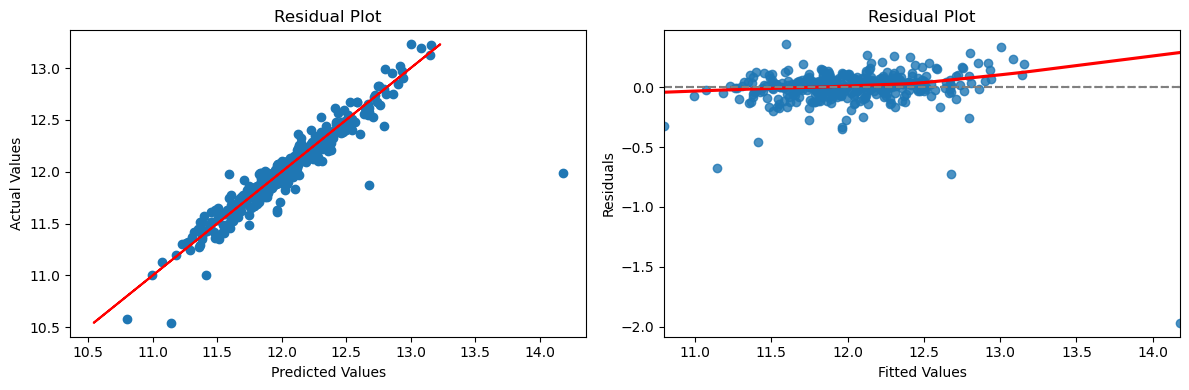

In [62]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted Values')
plt.plot(y_test, y_test, color='red', label='y=x')
plt.ylabel('Actual Values')
plt.title('Residual Plot')

residuals = y_test - y_pred
plt.subplot(1,2,2)
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

- We observe the existence of some leverage points in the residual plot.
- In general, as we can see from the residual plots below, the model tends to underestimate the house prices.

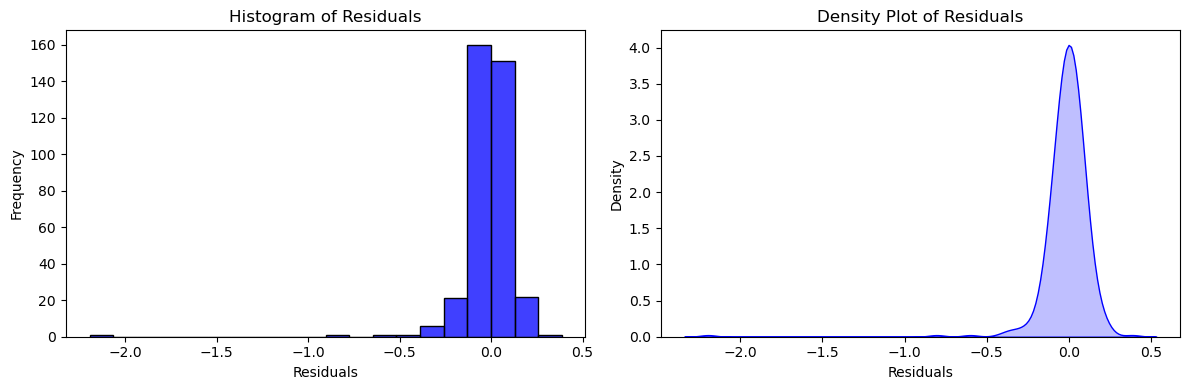

In [63]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
sns.histplot(residuals, kde=False, color='blue', bins=20)  # kde=False disables the kernel density estimate
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.subplot(1,2,2)
sns.kdeplot(residuals, color='blue', fill=True)  # Creates a kernel density estimate plot
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')

plt.tight_layout()
plt.show()

### Ridge Regression
Ridge regression is a regularization technique that adds a penalty term to the ordinary least squares method, aiming to shrink the coefficients towards zero, effectively reducing model complexity and mitigating multicollinearity. 

In [86]:
ridge = Ridge() # Regularization Penalty: alpha=0.1 (default)

ridge_fit = ridge.fit(X_train, y_train)
y_train_pred = ridge_fit.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
r2_train_score = r2_score(y_train, y_train_pred)

print(f'R Squared Score: {r2_train_score:.3f}')
print(f'Training MSE: {train_mse:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

R Squared Score: 0.940
Training MSE: 0.009
Training RMSE: 0.097


In [87]:
# Model Evaluation
y_pred = ridge_fit.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_rmse = np.sqrt(ridge_mse)
print(f'Ridge MSE: {ridge_mse:.3f}')
print(f'Ridge RMSE: {ridge_rmse:.3f}')

Ridge MSE: 0.024
Ridge RMSE: 0.156


- We are going to use 10 Fold Cross Validation for 30 different values of the parameter alpha between 0 and 10 in order to minimize the RMSE
- In other words:
    - For every values of alpha we split the training data in 10 equal subsets
    - Every time we train the model using Ridge Regression with the k-1 subsets and keep one subset to evaluate it
    - We repeat the process 10 times, in such a way that every time we evaluate the model with a different subset
    - By this way, every subset has been trained k-1 (10-1=9) times and has been tested exactly once
    - Finally, we evaluate our model, for an alpha value, averaging the test errors of each subset (CV Error)

In [108]:
alphas = np.linspace(0,10,30)

ridge = Ridge()
param_grid = [{'alpha': alphas}]

grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("Best Cross-validation Score (negative MSE):", best_score)

best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

Best Cross-validation Score (negative MSE): -0.01578556274710618


Ridge(alpha=3.1034482758620694)

In [109]:
y_pred = best_ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f'Ridge Regression MSE: {ridge_mse:.3f}')
print(f'Ridge Regression RMSE: {ridge_rmse:.3f}')

Ridge Regression MSE: 0.025
Ridge Regression RMSE: 0.159


### Lasso Regression
Lasso regression, or L1 regularization, is a linear regression technique that adds a penalty term to the ordinary least squares method, aiming to shrink some coefficients to exactly zero, effectively performing variable selection and promoting sparsity in the model. It's particularly useful when dealing with high-dimensional datasets or when feature selection is desired.

In [110]:
lasso = Lasso() # Regularization Penalty : alpha=1.0 (default)

lasso_fit = lasso.fit(X_train, y_train)
y_train_pred = lasso_fit.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f'Training MSE: {train_mse:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

Training MSE: 0.032
Training RMSE: 0.179


In [111]:
y_pred = lasso_fit.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_rmse = np.sqrt(lasso_mse)

print(f'Lasso Regression MSE: {lasso_mse:.3f}')
print(f'Lasso Regression RMSE: {lasso_rmse:.3f}')

Lasso Regression MSE: 0.062
Lasso Regression RMSE: 0.249


- We are going to use 10 Fold Cross Validation for 30 different values of the parameter alpha between 0 and 10.
- In other words:
    - For every values of alpha we split the training data in 10 equal subsets
    - Every time we train the model using Lasso Regression with the k-1 subsets and keep one subset to evaluate it
    - We repeat the process 10 times, in such a way that every time we evaluate the model with a different subset
    - By this way, every subset has been trained k-1 (10-1=9) times and has been tested exactly once
    - Finally, we evaluate our model, for an alpha value, averaging the test errors of each subset (CV Error)

In [114]:
alphas = np.linspace(0.001,10,30)

lasso = Lasso()
param_grid = [{'alpha': alphas}]

grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("Best Cross-validation Score (negative MSE):", best_score)

best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

Best Cross-validation Score (negative MSE): -0.016552016979225093


Lasso(alpha=0.001)

In [115]:
y_pred = best_lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred)
lasso_rmse = np.sqrt(lasso_mse)

print(f'Lasso Regression MSE: {lasso_mse:.3f}')
print(f'Lasso Regression RMSE: {lasso_rmse:.3f}')

Lasso Regression MSE: 0.028
Lasso Regression RMSE: 0.167


### Regression Trees
Regression Trees are a non-parametric method used for regression tasks, partitioning the feature space into regions to capture complex relationships. They offer interpretability and flexibility, but may prone to overfitting if not properly tuned

In [64]:
reg = DecisionTreeRegressor()

reg_tree = reg.fit(X_train, y_train)
y_train_pred = reg_tree.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print(f'Training MSE: {train_mse:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

Training MSE: 0.000
Training RMSE: 0.000


The regression tree model is overfitted. We are going to prune the tree using the cost complexity penalty (ccp_alpha) parameter. 
The ccp_alpha parameter in Decision Trees controls the complexity of the tree by penalizing the creation of additional nodes. Higher values of ccp_alpha result in simpler trees with fewer nodes. Adjusting this parameter helps prevent overfitting by pruning the tree based on the cost-complexity pruning criterion.

### Hyperparameter Tuning 
We repeat the Cross Validation process using GridSearchCV in order to tune the best value for cost complexity penalty (ccp_alpha)

ccp_alpha: 0.0000 | Train Error: 0.000 | Test Error: 0.037
ccp_alpha: 0.0005 | Train Error: 0.024 | Test Error: 0.040
ccp_alpha: 0.0010 | Train Error: 0.032 | Test Error: 0.041
ccp_alpha: 0.0020 | Train Error: 0.041 | Test Error: 0.049
ccp_alpha: 0.0050 | Train Error: 0.055 | Test Error: 0.053
ccp_alpha: 0.0100 | Train Error: 0.062 | Test Error: 0.061
ccp_alpha: 0.0500 | Train Error: 0.085 | Test Error: 0.087
ccp_alpha: 0.1000 | Train Error: 0.158 | Test Error: 0.164
ccp_alpha: 0.3000 | Train Error: 0.158 | Test Error: 0.164


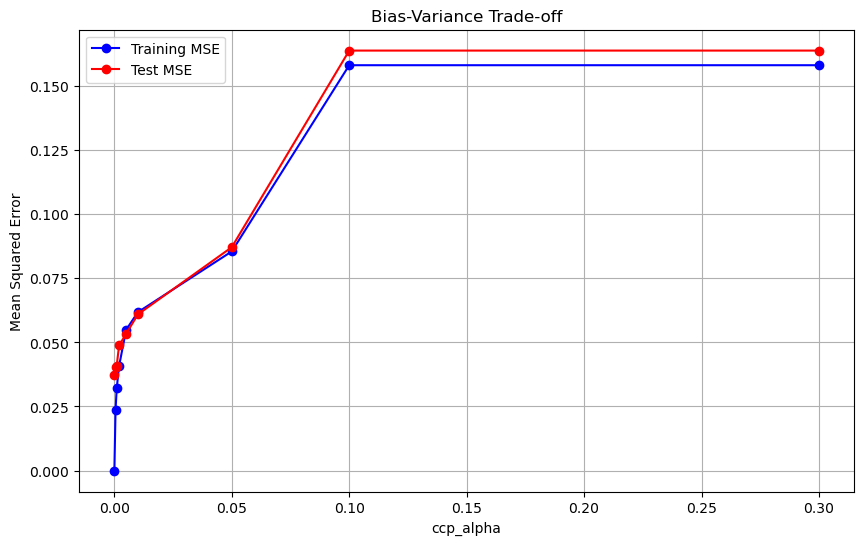

In [65]:
ccp_alphas = [0.0, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.05, 0.1, 0.3]

train_errors = []
test_errors = []

for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    reg.fit(X_train, y_train)
    
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f"ccp_alpha: {ccp_alpha:.4f} | Train Error: {train_error:.3f} | Test Error: {test_error:.3f}")


plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_errors, marker='o', label='Training MSE', color='blue')
plt.plot(ccp_alphas, test_errors, marker='o', label='Test MSE', color='red')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()

We need to find the right balance between bias and variance in our regression tree model.
- We choose __ccp_alpha = 0.001__ because of low test mse.
- Additionally this value of alpha keeps the difference between training and test errors difference quite small.

In [66]:
reg = DecisionTreeRegressor(ccp_alpha=0.001)

reg_tree = reg.fit(X_train, y_train)
y_train_pred = reg_tree.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print(f'Training MSE: {train_mse:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

Training MSE: 0.032
Training RMSE: 0.179


In [67]:
y_pred = reg_tree.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)

print(f'Test MSE: {tree_mse:.3f}')
print(f'Test RMSE: {tree_rmse:.3f}')

Test MSE: 0.041
Test RMSE: 0.202


### Random Forests 

Random Forests are an ensemble learning method consisting of multiple decision trees trained on random subsets of the data. By averaging the predictions of these trees, Random Forests prevent overfitting and improve generalization performance.

In [68]:
rf = RandomForestRegressor()

forest = rf.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
training_mse = mean_squared_error(y_train, y_train_pred)
training_rmse = np.sqrt(training_mse)
print(f'RF Training MSE: {training_mse:.3f}')
print(f'RF Training RMSE: {training_rmse:.3f}')

Training MSE: 0.003


In [69]:
y_pred = forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Test MSE: {mse:.3f}')
print(f'Test RMSE: {rmse:.3f}')

Test MSE: 0.021
Test RMSE: 0.145


The model is not overfitted but has high variance. 

In [70]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

start_time = time.time()

grid_search.fit(X_train, y_train)

end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best Cross-validation Score (negative MSE):", best_score)

best_model = grid_search.best_estimator_

Elapsed Time: 191.8526327610016 seconds
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score (negative MSE): -0.02181056486050262


In [71]:
y_pred = best_model.predict(X_test)
rf_test_mse = mean_squared_error(y_test, y_pred)
rf_test_rmse = np.sqrt(rf_test_mse)
print(f'Test MSE: {rf_test_mse:.3f}')
print(f'Test RMSE: {rf_test_rmse:.3f}')

Test MSE: 0.020
Test RMSE: 0.143


### Gradient Boosting Regression 

In [72]:
grad = GradientBoostingRegressor()

grad_fit = grad.fit(X_train, y_train)
y_train_pred = grad_fit.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Training MSE: {train_mse:.3f}')

Training MSE: 0.006


In [73]:
y_pred = grad_fit.predict(X_test)
grad_mse = mean_squared_error(y_test, y_pred)
grad_rmse = np.sqrt(grad_mse)

print(f'Test MSE: {grad_mse:.3f}')
print(f'Test RMSE: {grad_rmse:.3f}')

Test MSE: 0.016
Test RMSE: 0.128


In [76]:
grad = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 250],  # Number of trees in the forest
    'learning_rate' : [0.01, 0.1],
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

grid_search = GridSearchCV(estimator=grad, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

start_time = time.time()

grid_search.fit(X_train, y_train)

end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best Cross-validation Score (negative MSE):", best_score)

best_model = grid_search.best_estimator_

Elapsed Time: 15.105965375900269 seconds
Best Hyperparameters: {'learning_rate': 0.1, 'max_features': 'sqrt', 'n_estimators': 250}
Best Cross-validation Score (negative MSE): -0.017786199292180234


In [77]:
y_pred = best_model.predict(X_test)
grad_mse = mean_squared_error(y_test, y_pred)
grad_rmse = np.sqrt(grad_mse)
print(f'Test MSE: {grad_mse:.3f}')
print(f'Test RMSE: {grad_rmse:.3f}')

Test MSE: 0.016
Test RMSE: 0.125


In [116]:
mses = [lin_reg_mse, ridge_mse, lasso_mse, tree_mse, rf_test_mse, grad_mse]
rmses = [lin_reg_rmse, ridge_rmse, lasso_rmse, tree_rmse, rf_test_rmse, grad_rmse]
methods = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Regression Trees', 'Random Forests', 'Gradient Boosting']

mses_rounded = [round(mse, 3) for mse in mses]
rmses_rounded = [round(rmse, 3) for rmse in rmses]

data = {
    'Model': methods,
    'MSE': mses_rounded,
    'RMSE': rmses_rounded
}

df = pd.DataFrame(data)
df.sort_values(by='RMSE', ascending=True)

,Model,MSE,RMSE
5,Gradient Boosting,0.016,0.125
4,Random Forests,0.020,0.143
0,Linear Regression,0.025,0.159
1,Ridge Regression,0.025,0.159
2,Lasso Regression,0.028,0.167
3,Regression Trees,0.041,0.202


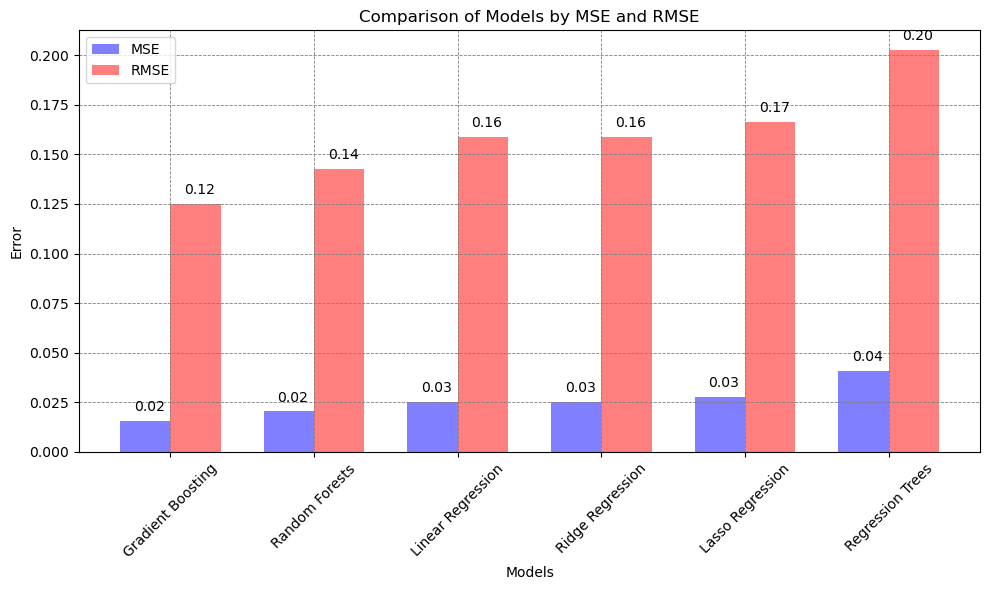

In [118]:
mses = [lin_reg_mse, ridge_mse, lasso_mse, tree_mse, rf_test_mse, grad_mse]
rmses = [lin_reg_rmse, ridge_rmse, lasso_rmse, tree_rmse, rf_test_rmse, grad_rmse]
methods = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Regression Trees', 'Random Forests', 'Gradient Boosting']

sorted_indices = np.argsort(rmses)
sorted_rmses = [rmses[i] for i in sorted_indices]
sorted_mses = [mses[i] for i in sorted_indices]
sorted_methods = [methods[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(methods))

plt.bar(index, sorted_mses, bar_width, color='b', alpha=0.5, label='MSE')
plt.bar([i + bar_width for i in index], sorted_rmses, bar_width, color='r', alpha=0.5, label='RMSE')

for i in index:
    plt.text(i - 0.08, sorted_mses[i] + 0.005, f'{sorted_mses[i]:.2f}', color='black')
    plt.text(i + bar_width - 0.08, sorted_rmses[i] + 0.005, f'{sorted_rmses[i]:.2f}', color='black')

plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of Models by MSE and RMSE')
plt.xticks([i + bar_width / 2 for i in index], sorted_methods, rotation=45)
plt.legend()

plt.grid(linestyle= '--', linewidth=0.6, c='grey')
plt.tight_layout()
plt.show()
